# 📘 Project Report – AG News Text Classification

**Authors:** Gössl Marcel, Marek Simon, Schrenk Dominik, Unger Miriam  
**Date:** 06.11.2025  
**Course:** Natural Language Processing  
**GitHub Repository:**  
https://github.com/Dom4i/NLP_AG_news_Project  

---

## 1. Dataset Description

**Dataset:**  
https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset?resource=download&select=train.csv  

Der Datensatz besteht aus **über 120.000 Nachrichtenartikeln** und enthält **3 Spalten**:

- **Class Index** (1–4)
- **Title**
- **Description**

**Klassennamen:**

| Class Index | Topic               |
|-------------|---------------------|
| 1           | World               |
| 2           | Sports              |
| 3           | Business            |
| 4           | Sci/Tech            |

**Anzahl der Zeilen:** 127.600  
**Anzahl der Klassen:** 4  
**Balanced / Imbalanced?**  
Der Datensatz ist **balanciert**, was man in den späteren Visualisierungen gut sehen kann.

**Preprocessing / Splitting:**  
Der Datensatz war bereits in **train.csv** und **test.csv** aufgeteilt – wir haben diesen Split unverändert übernommen.

---

## 2. Relation to Real Applications

Dieses Projekt zeigt, wie man Texte automatisch in Kategorien einordnen kann.  
In der realen Welt werden solche Modelle z. B. verwendet für:

- automatische Sortierung von Nachrichtenartikeln  
- E-Mail-Filter (z. B. Spam-Erkennung)  
- Sortieren von Kundenbewertungen oder Kommentaren  
- Analyse großer Textmengen ohne manuelles Lesen  

**Praktischer Nutzen:**

- spart Zeit  
- reduziert Fehler  
- hilft, schnell Überblick über große Textmengen zu bekommen  

---

## 3. Problems and Solutions

**Gefundene Probleme & unsere Lösungen:**

- In den Top-Wörtern kam sehr häufig **`39`** vor → das ist ein HTML-Code für **Apostroph (`'`)**  
  → gelöst durch HTML-Unescape in der Vorverarbeitung
- Begriffe wie *AP*, *APF*, *Reuter*, *New York* tauchten oft auf – das sind Nachrichtenagenturen  
  → wurden entfernt, da sie keinen thematischen Wert haben
- **Requirements-Konflikte** (z. B. inkompatible Numpy-Versionen)  
  → gelöst durch eine saubere **virtuelle Umgebung (venv)** und aktualisierte requirements

---

## 4. Implementation Details

Für dieses Projekt haben wir **Python** und folgende Technologien verwendet:

- **Pandas / NumPy** → Datenverarbeitung  
- **scikit-learn** → klassisches Modell (Naive Bayes)  
- **TensorFlow / Keras** → LSTM-Modell  
- **Matplotlib / Seaborn** → Visualisierungen  
- eigene Python-Module für Preprocessing, Training und Evaluation

Wir haben zwei Modelltypen eingesetzt:

### 🔹 Naive Bayes
- sehr schnell trainierbar  
- gut für klar trennbare Textdaten  
- starke Baseline für Textklassifikation

### 🔹 LSTM
- betrachtet Text als Sequenz  
- erkennt zusammenhängende Muster und Kontext  
- leistungsfähiger bei komplexeren Artikeln  

So konnten wir vergleichen, welcher Ansatz für AG News besser geeignet ist.

---

## 5. Results and Evaluation

Wir haben zwei Modelle getestet:

- **Naive Bayes**
- **LSTM**

Beide erreichen über **90% Accuracy**.

**Erkennbar am besten:**  
→ *Sports* und *World*

**Schwieriger zu unterscheiden:**  
→ *Business* und *Sci/Tech* (inhaltliche Überschneidungen)

Das **LSTM** schneidet insgesamt etwas besser ab – besonders bei längeren oder komplexeren Texten.  

Die Visualisierungen (Confusion Matrix, t-SNE, Feature-Heatmaps) zeigen sehr gut, welche Klassen leicht oder schwer zu erkennen sind und welche Wörter wichtige Hinweise geben.

---

## 6. Discussion and Learnings

Mit dem **Naive-Bayes-Modell** lief alles sehr entspannt – bekanntes Vorgehen, wenig Komplexität.  
Beim **LSTM** mussten wir uns viel genauer damit beschäftigen:

- Tokenizer richtig konfigurieren  
- Embeddings verstehen  
- Overfitting vermeiden  
- Validation Loss im Auge behalten  

Insgesamt war das Projekt aber **angenehm und lehrreich**,  
und viele Inhalte aus dem Unterricht haben durch die Umsetzung plötzlich viel mehr Sinn ergeben.

---


# AG News Text Classification – Projekt-Report

In diesem Notebook dokumentieren wir den **kompletten Arbeitsablauf** für das NLP-Projekt mit dem  
**AG News** Datensatz.

Ziele dieses Notebooks:

1. **Datenüberblick**: Struktur des Datensatzes, Klassenverteilung, Beispieltexte  
2. **Vorverarbeitung**: Texte vorbereiten (Titel + Beschreibung zusammenführen, Bereinigung)  
3. **Naive Bayes Modell**: Training, Auswertung und Visualisierung  
4. **LSTM Modell**: Training, Auswertung und Visualisierung  
5. **Visualisierung**: Ergebnisse und Erkenntnisse




In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from src.config import CLASS_NAMES
from src.data_loading import load_train_test
from src.preprocessing import get_text_and_labels
from src.naive_bayes import build_naive_bayes_pipeline
from src.evaluation import evaluate_model

from src.config import MAX_VOCAB_SIZE, MAX_SEQ_LEN, BATCH_SIZE, EPOCHS
from src.lstm import build_lstm_model
from src.visualizationNB import (
     plot_top_words,
     plot_wordclouds,
     plot_roc_curves,
     plot_precision_recall,
     plot_feature_weights_heatmap,
     plot_class_distribution as plot_class_distribution_nb,
 )
from src.visualizationLSTM import (
     plot_history,
     plot_confusion_matrix,
     plot_prediction_confidence,
     show_misclassified_examples,
     plot_tsne_embeddings,
     plot_class_distribution as plot_class_distribution_lstm,
     plot_error_vs_length,
     plot_confidence_per_class,
 )

print("Imports erfolgreich geladen.")


Imports erfolgreich geladen.


## 1. Daten laden und Überblick

Im ersten Schritt laden wir den AG-News-Datensatz (`train.csv` und `test.csv`) mit den bereits
vorhandenen Hilfsfunktionen aus dem Projekt.

Wir schauen uns dabei an:

- wie viele Zeilen Train- und Testdaten haben (Shape)
- wie die ersten Beispielzeilen aussehen
- wie die Klassenverteilung im Trainingsdatensatz ist
- welches Mapping von `Class Index` zu den Topic-Namen (`CLASS_NAMES`) verwendet wird


Train-Shape: (120000, 3)
Test-Shape:  (7600, 3)


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."



Klassenverteilung im Trainingsset (Class Index):
Class Index
1    30000
2    30000
3    30000
4    30000
Name: count, dtype: int64


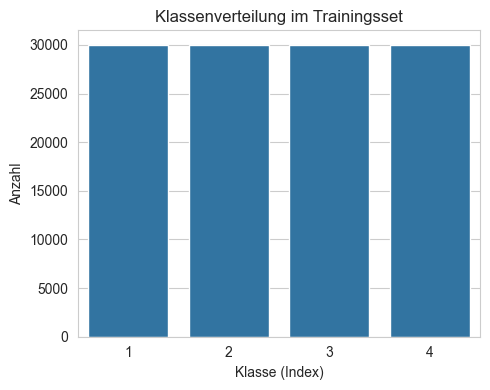


Mapping der Klassen (Class Index -> Topic):
1 -> World
2 -> Sports
3 -> Business
4 -> Science


In [5]:
# Train- und Testdaten mit der Projektfunktion laden
train_df, test_df = load_train_test()

print("Train-Shape:", train_df.shape)
print("Test-Shape: ", test_df.shape)

# Die ersten Zeilen des Trainingsdatensatzes anzeigen
display(train_df.head())

# Klassenverteilung im Trainingsset (numerische Labels)
print("\nKlassenverteilung im Trainingsset (Class Index):")
print(train_df["Class Index"].value_counts().sort_index())

# Klassenverteilung als Balkendiagramm visualisieren
plt.figure(figsize=(5, 4))
sns.countplot(x=train_df["Class Index"])
plt.title("Klassenverteilung im Trainingsset")
plt.xlabel("Klasse (Index)")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

# Mapping von Klassenindex zu Topic-Namen ausgeben
print("\nMapping der Klassen (Class Index -> Topic):")
for idx, name in CLASS_NAMES.items():
    print(f"{idx} -> {name}")


## 2. Vorverarbeitung der Texte

In diesem Schritt bereiten wir die Daten für das Modell vor:

- **Title** und **Description** werden zu einem einzigen Textfeld kombiniert  
- HTML-Sonderzeichen wie `#39` werden automatisch bereinigt 
- Auch Namensagenturen wie Reuters oder andere die sehr häufig vorkommen, werden entfernt
- Die Zielvariable (**Class Index**) wird ebenfalls ausgegeben  
- Wir lassen uns einen Beispieltext mit dem zugehörigen Topic anzeigen  


In [7]:
# Texte (X) und Labels (y) vorbereiten
X_train_text, y_train = get_text_and_labels(train_df)
X_test_text, y_test = get_text_and_labels(test_df)

# Beispiel ausgeben
print("Beispieltext (kombinierter Titel + Beschreibung):")
print("---------------------------------------------------")
print(X_train_text.iloc[0])

print("\nZugehörige Klasse:")
label = y_train.iloc[0]
print(label, "->", CLASS_NAMES[label])


Beispieltext (kombinierter Titel + Beschreibung):
---------------------------------------------------
Wall St. Bears Claw Back Into the Black () - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Zugehörige Klasse:
3 -> Business


## 3. Naive Bayes Modell

Als erstes klassisches Modell verwenden wir **Naive Bayes** in Kombination mit einem
**TF-IDF-Vektorisierer**.

Vorteile:

- sehr schnell trainierbar
- funktioniert gut bei Bag-of-Words Textdaten
- guter erster Baseline-Klassifikator

Wir trainieren das Modell auf den vorbereiteten Trainingsdaten und werten es anschließend mit
Accuracy, Klassifikationsreport und Confusion-Matrix aus.


Training Naive Bayes Modell...

--- Evaluation: Naive Bayes ---
=== Klassen / Topics ===
1 -> World
2 -> Sports
3 -> Business
4 -> Science

=== Naive Bayes (TF-IDF) ===
Accuracy: 0.9007

Classification report:
              precision    recall  f1-score   support

       World       0.91      0.89      0.90      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.88      0.84      0.86      1900
     Science       0.87      0.89      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



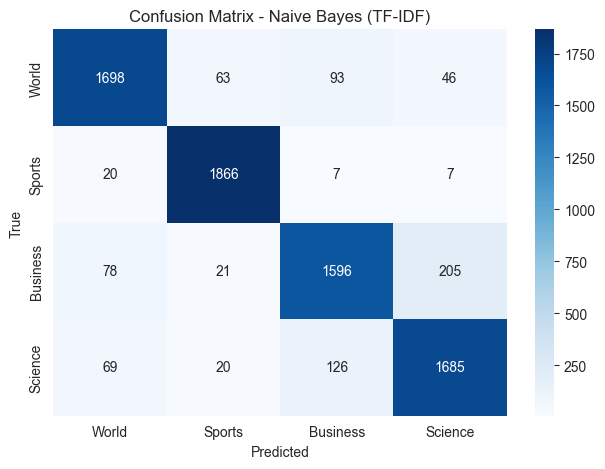

In [8]:
# Naive-Bayes-Pipeline bauen
nb_model = build_naive_bayes_pipeline()

print("Training Naive Bayes Modell...")
nb_model.fit(X_train_text, y_train)

print("\n--- Evaluation: Naive Bayes ---")
evaluate_model(nb_model, X_test_text, y_test, title="Naive Bayes (TF-IDF)")


## 4. Visualisierung der Naive-Bayes-Ergebnisse

Um das Verhalten des Naive-Bayes-Modells besser zu verstehen, schauen wir uns
verschiedene Visualisierungen an:

- **Top-Wörter pro Klasse**: Welche Begriffe sind für ein Topic besonders typisch? (So haben wir auch zuerst die Häufigkeit von 39 und den Agenturnamen bemerkt)
- **Wordclouds**: Intuitive Darstellung häufiger Wörter pro Klasse (Weils so schön bunt ist)
- **ROC-Kurven**: Wie gut trennt das Modell die Klassen (One-vs-Rest)?
- **Precision-Recall-Kurven**: Verhältnis zwischen Präzision und Recall je Klasse
- **Feature-Gewichte (Heatmap)**: Welche Wörter haben hohe/geringe Gewichte?
- **Klassenverteilung Train vs. Test**: Überblick, ob die Verteilung ähnlich ist (Ist komplett der Fall hier, weil es vorgegeben ist)

Diese Plots sind vor allem für den Bericht und die Präsentation hilfreich, um
die Ergebnisse nicht nur als Zahlen, sondern auch **visuell** zu zeigen.




Verwendete Klassennamen für die Plots: ['World', 'Sports', 'Business', 'Science']

=== Top-Wörter pro Klasse (Naive Bayes) ===


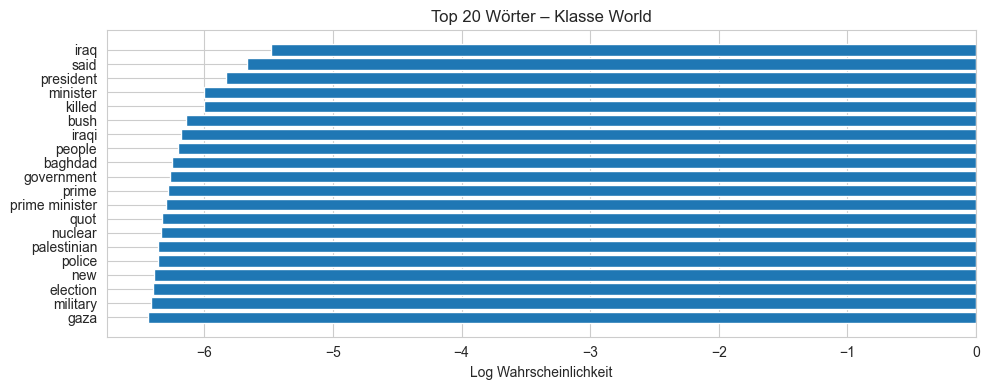

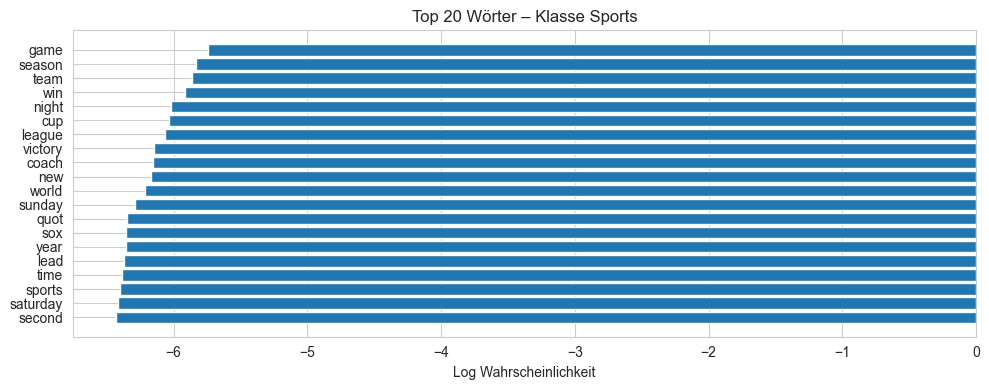

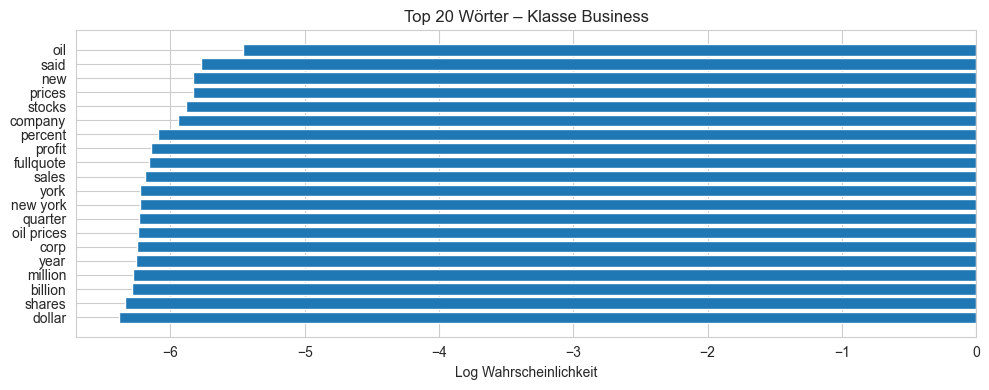

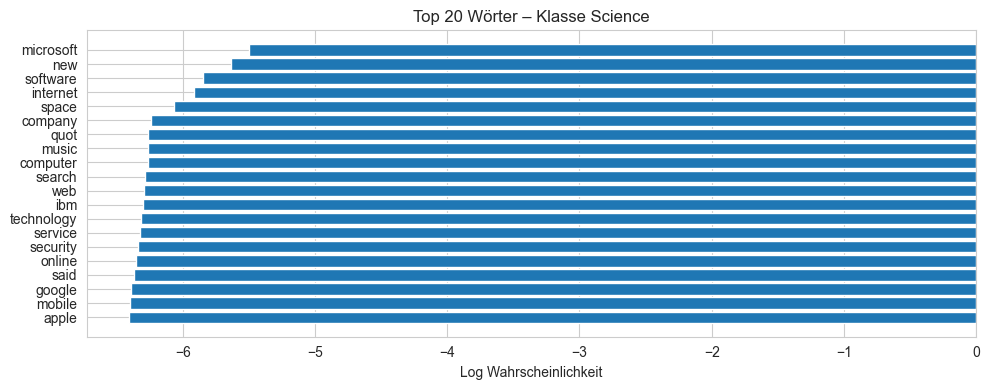


=== Wordclouds pro Klasse (Naive Bayes) ===


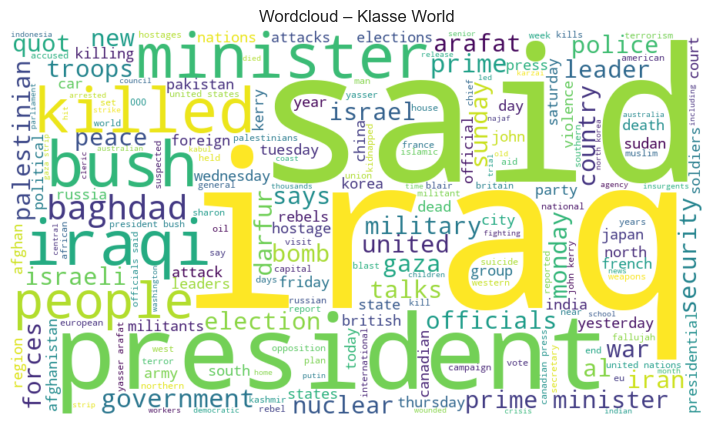

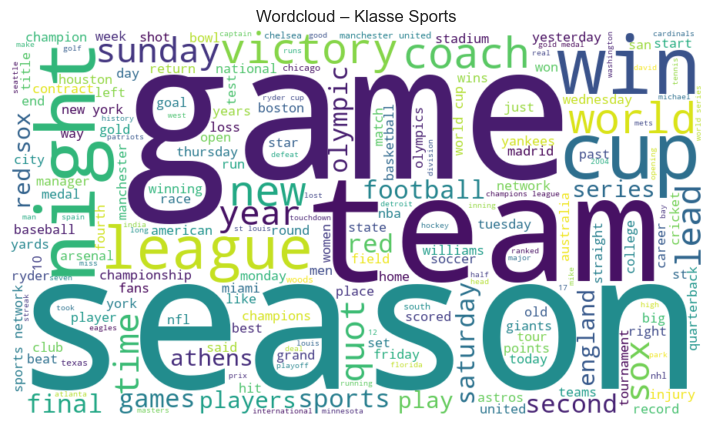

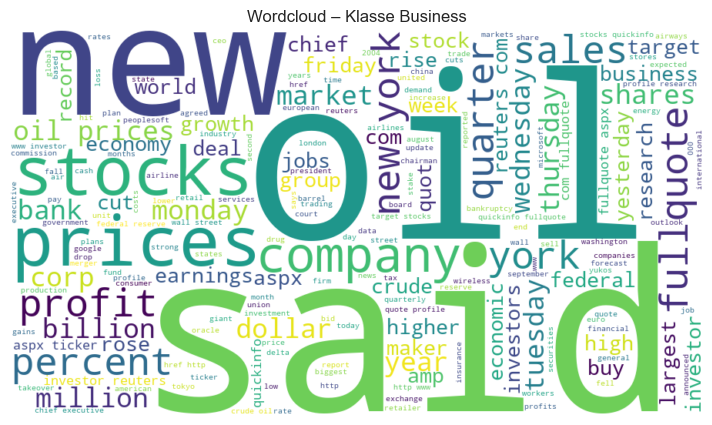

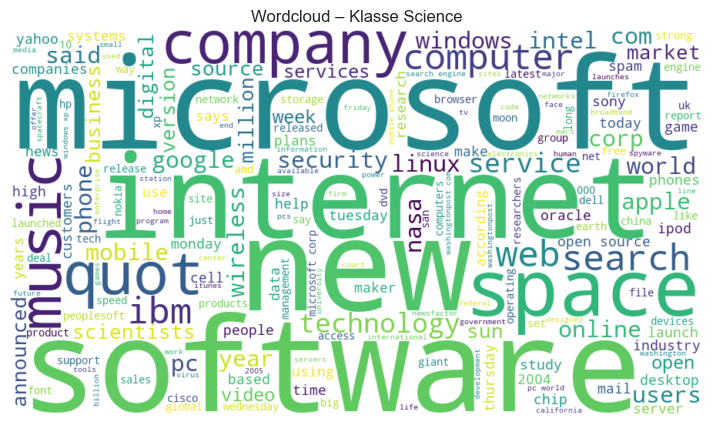


=== ROC-Kurven (Naive Bayes) ===


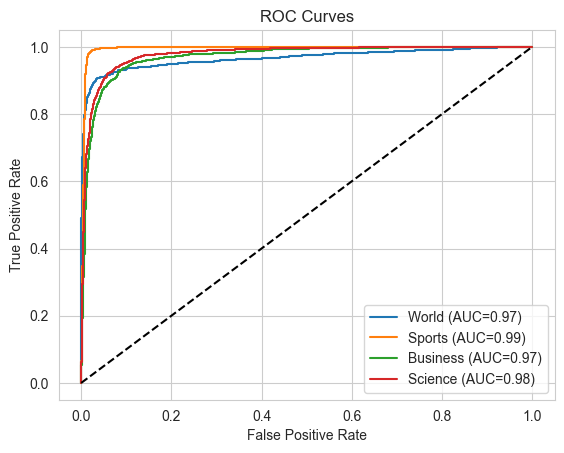


=== Precision-Recall-Kurven (Naive Bayes) ===


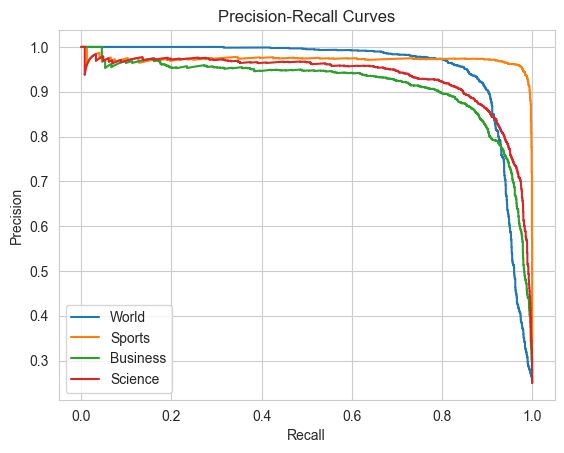


=== Feature-Gewichte (Heatmap) ===


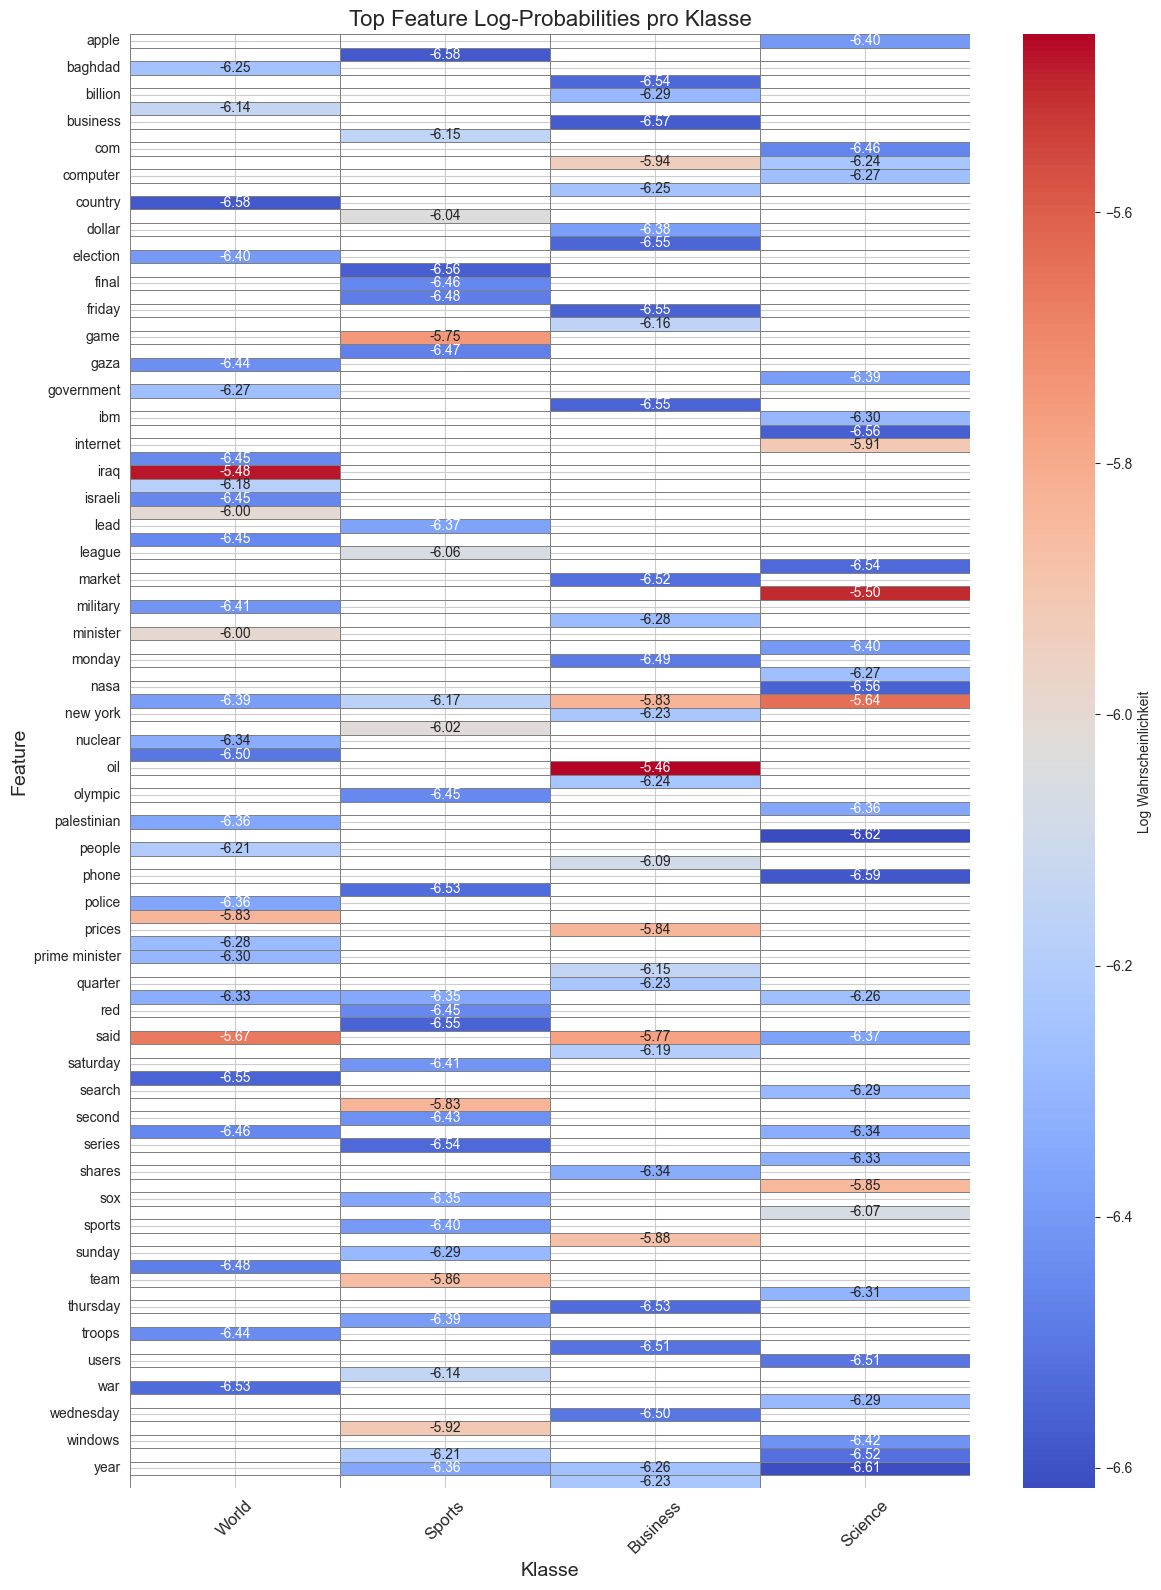


=== Klassenverteilung Train vs. Test (Naive Bayes) ===


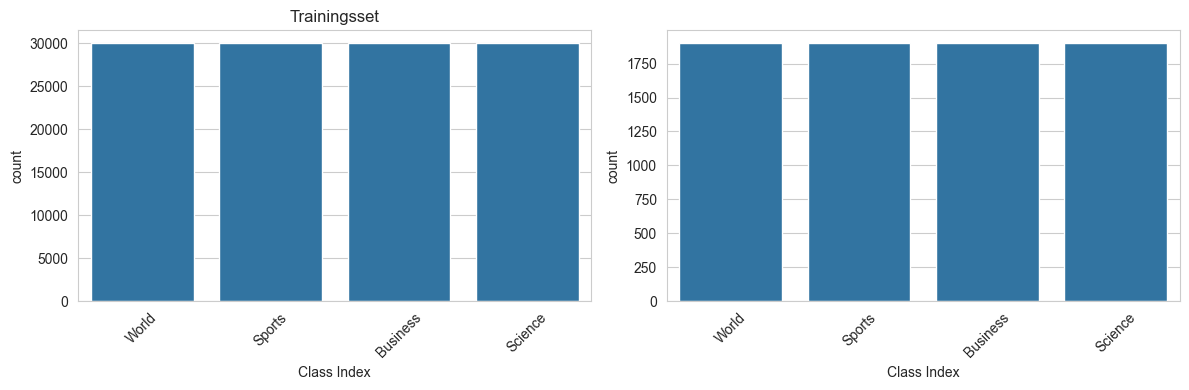

In [9]:
# Liste der Klassennamen aus dem Mapping erstellen (in fester Reihenfolge 1..4)
class_indices = sorted(CLASS_NAMES.keys())
class_names_list = [CLASS_NAMES[i] for i in class_indices]

print("Verwendete Klassennamen für die Plots:", class_names_list)

# 1) Top-Wörter pro Klasse
print("\n=== Top-Wörter pro Klasse (Naive Bayes) ===")
plot_top_words(nb_model, n=20, class_names=class_names_list)

# 2) Wordclouds pro Klasse
print("\n=== Wordclouds pro Klasse (Naive Bayes) ===")
plot_wordclouds(nb_model, class_names=class_names_list)

# 3) ROC-Kurven (One-vs-Rest)
print("\n=== ROC-Kurven (Naive Bayes) ===")
plot_roc_curves(nb_model, X_test_text, y_test, class_names=class_names_list)

# 4) Precision-Recall-Kurven
print("\n=== Precision-Recall-Kurven (Naive Bayes) ===")
plot_precision_recall(nb_model, X_test_text, y_test, class_names=class_names_list)

# 5) Feature-Gewichte als Heatmap
print("\n=== Feature-Gewichte (Heatmap) ===")
plot_feature_weights_heatmap(nb_model, class_names=class_names_list, top_n=30)

# 6) Klassenverteilung Train vs. Test
print("\n=== Klassenverteilung Train vs. Test (Naive Bayes) ===")
plot_class_distribution_nb(y_train, y_test, class_names=class_names_list)


## 5. Vorbereitung für das LSTM-Modell

Bevor wir ein LSTM trainieren können, müssen die Textdaten in eine Form gebracht werden,
die ein neuronales Netzwerk verstehen kann.

Dafür benötigen wir drei Schritte:

1. **Tokenizer fitten**  
   Der Tokenizer erstellt ein Wörterbuch und weist jedem Wort eine Ganzzahl zu.

2. **Texte in Sequenzen umwandeln**  
   Jeder Text wird zu einer Liste von Zahlen (z. B. `[14, 55, 283, ...]`).

3. **Padding / Truncating**  
   Alle Sequenzen müssen gleich lang sein, damit sie in das LSTM passen.  
   Wir verwenden `MAX_SEQ_LEN` aus der `config.py`.

Damit haben wir die Daten in der Form, die für ein LSTM-Modell geeignet ist.


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1) Tokenizer auf den Trainingsdaten fitten
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

# 2) Texte in Sequenzen umwandeln
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# 3) Padding und Truncating anwenden
X_train_pad = pad_sequences(
    X_train_seq,
    maxlen=MAX_SEQ_LEN,
    padding="post",
    truncating="post"
)

X_test_pad = pad_sequences(
    X_test_seq,
    maxlen=MAX_SEQ_LEN,
    padding="post",
    truncating="post"
)

print("Train-Pad-Shape:", X_train_pad.shape)
print("Test-Pad-Shape: ", X_test_pad.shape)

# Vokabulargröße bestimmen
vocab_size = min(MAX_VOCAB_SIZE, len(tokenizer.word_index) + 1)
print("Vokabulargröße:", vocab_size)


Train-Pad-Shape: (120000, 50)
Test-Pad-Shape:  (7600, 50)
Vokabulargröße: 20000


## 6. LSTM-Modell aufbauen und trainieren

Für das zweite Modell verwenden wir ein **LSTM (Long Short-Term Memory)** Netzwerk.

Warum LSTM?

- kann längere Textabhängigkeiten lernen
- erkennt Muster, die TF-IDF + Naive Bayes nicht erfassen können
- liefert oft bessere Ergebnisse für Textklassifikation

Ablauf:

1. **LSTM-Modell mit Embedding-Schicht bauen**  
2. **Labels in 0-basierte Klassen umwandeln** (Keras erwartet 0–3 statt 1–4)  
3. **Training mit EarlyStopping**, um Overfitting zu vermeiden, stoppt deswegen schon bei Epoche 3
4. **Wrapper verwenden**, damit das Modell wie ein sklearn-Klassifikator verwendbar ist  


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# 1) LSTM-Modell bauen
lstm_model = build_lstm_model(vocab_size=vocab_size)
lstm_model.summary()

# 2) Labels auf 0-basiert umwandeln (1..4 -> 0..3)
y_train_0based = y_train.values - 1

# 3) Callback für Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
)

# 4) Training des Modells
history = lstm_model.fit(
    X_train_pad,
    y_train_0based,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop],
    verbose=1,
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8679 - loss: 0.3963 - val_accuracy: 0.9039 - val_loss: 0.2700
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9303 - loss: 0.2221 - val_accuracy: 0.9077 - val_loss: 0.2669
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9418 - loss: 0.1796 - val_accuracy: 0.8976 - val_loss: 0.3025
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9496 - loss: 0.1489 - val_accuracy: 0.8963 - val_loss: 0.3147


## 7. LSTM-Modell auswerten und visualisieren

Nachdem das LSTM trainiert wurde, wollen wir es ähnlich wie Naive Bayes auswerten:

- **Accuracy und Klassifikationsreport** mit der bestehenden `evaluate_model`-Funktion  
- **Confusion-Matrix** des LSTM-Modells  
- **Trainingsverlauf (History)**: Accuracy und Loss über die Epochen  
- **Vorhersage-Sicherheit (Confidence)**: Wie sicher ist das Modell bei seinen Entscheidungen?  
- **Falsch klassifizierte Beispiele**: Einige Beispiele, bei denen das Modell daneben liegt  
- **Fehler vs. Textlänge**: Werden längere oder kürzere Texte eher falsch klassifiziert?  
- **Confidence pro Klasse**: Wie verteilt sich die Softmax-Wahrscheinlichkeit je Klasse?

Dafür verwenden wir die Funktionen aus `visualizationLSTM.py` und einen kleinen Wrapper,
damit das Keras-Modell mit `evaluate_model()` kompatibel ist.



--- Evaluation: LSTM (Keras) ---
=== Klassen / Topics ===
1 -> World
2 -> Sports
3 -> Business
4 -> Science

=== LSTM (Keras) ===
Accuracy: 0.9116

Classification report:
              precision    recall  f1-score   support

       World       0.95      0.88      0.91      1900
      Sports       0.96      0.98      0.97      1900
    Business       0.85      0.90      0.88      1900
     Science       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



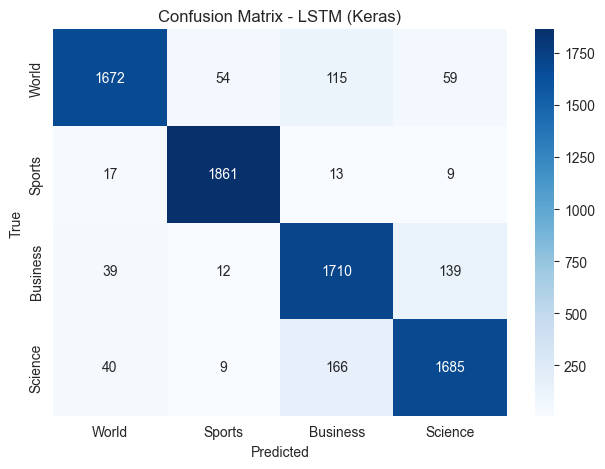

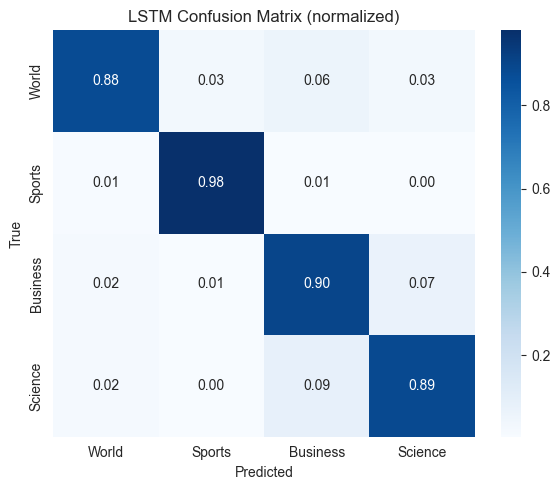

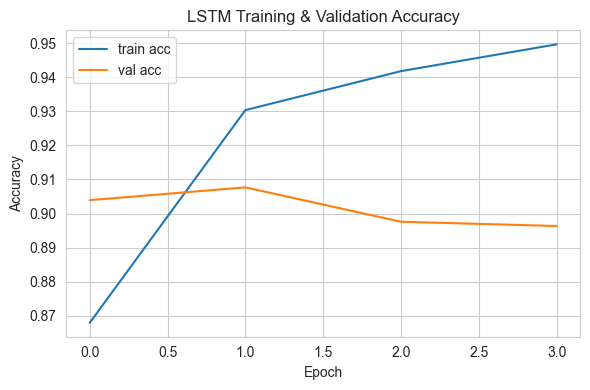

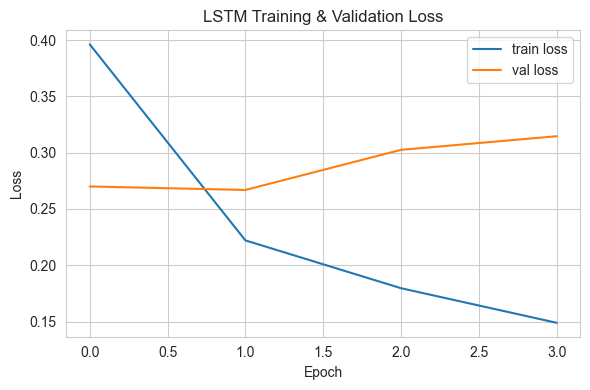

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


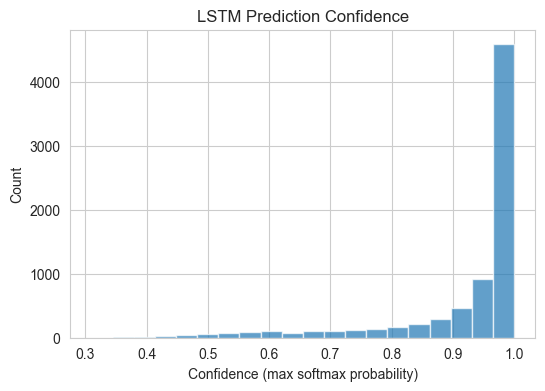


=== Falsch klassifizierte Beispiele: 672 ===

Text 3:
Prediction Unit Helps Forecast Wildfires () - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flam...
True: Science, Pred: Business
------------------------------------------------------------
Text 9:
Card fraud unit nets 36,000 cards In its first two years, the UK's dedicated card fraud unit, has recovered 36,000 stolen cards and 171 arrests - and estimates it saved 65m....
True: Science, Pred: World
------------------------------------------------------------
Text 20:
IBM to hire even more new workers By the end of the year, the computing giant plans to have its biggest headcount since 1991....
True: Science, Pred: Business
------------------------------------------------------------
Text 23:
Some People Not Eligible to Get in on G

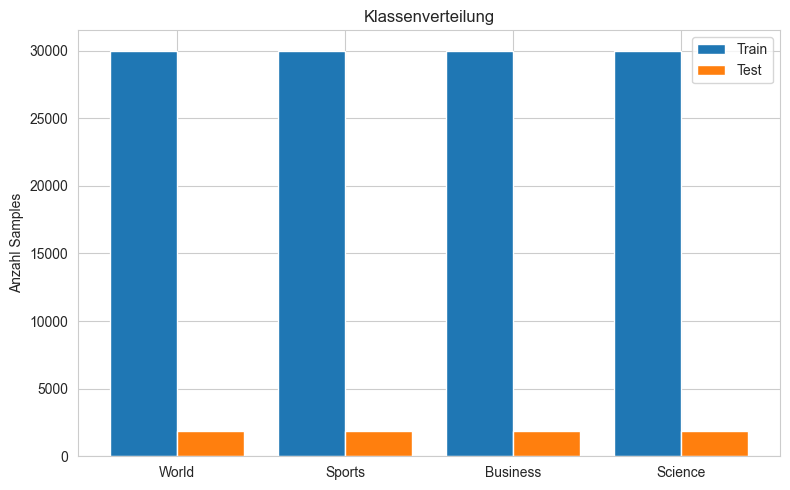

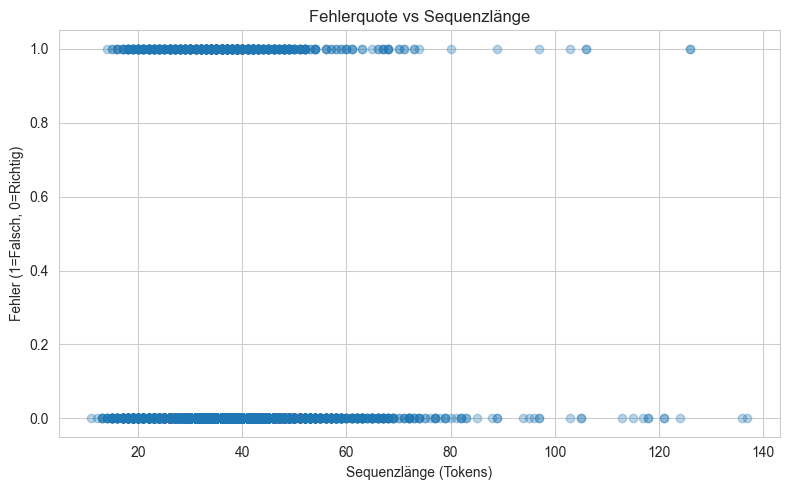

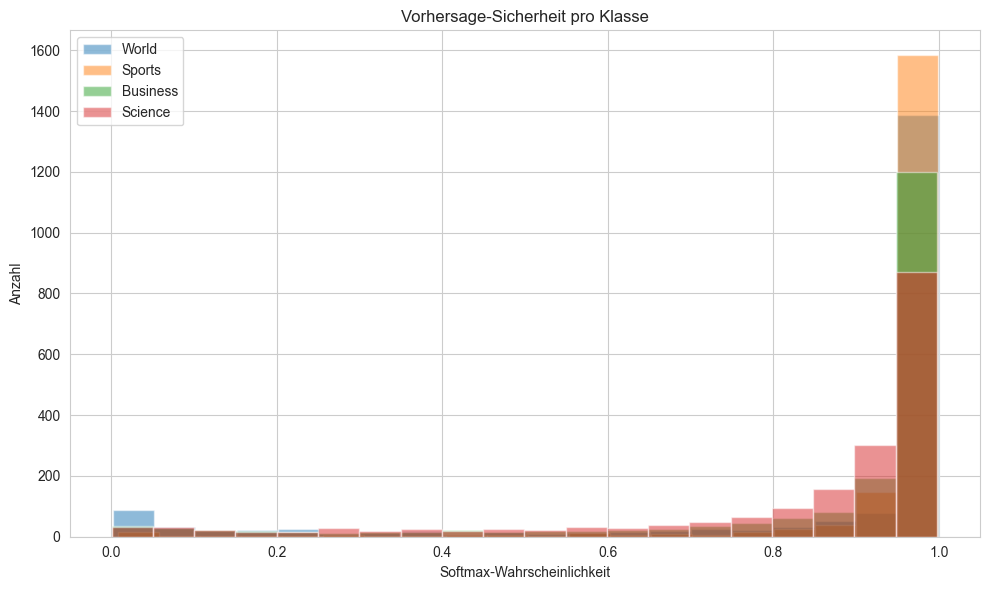

In [15]:
import numpy as np

# Wrapper-Klasse, damit evaluate_model() mit dem Keras-Modell arbeiten kann
class KerasPredictWrapper:
    """
    Wrapper, damit unser Keras-Modell mit evaluate_model() kompatibel ist.
    evaluate_model() erwartet ein Objekt mit .predict(X), das Klassenlabels (1..4) zurückgibt.
    """
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        proba = self.model.predict(X, verbose=0)
        # argmax -> 0..3, +1 -> 1..4 (wie im Dataset)
        return np.argmax(proba, axis=1) + 1


# 1) Evaluation mit der bestehenden evaluate_model-Funktion
wrapped_lstm = KerasPredictWrapper(lstm_model)

print("\n--- Evaluation: LSTM (Keras) ---")
evaluate_model(wrapped_lstm, X_test_pad, y_test, title="LSTM (Keras)")


# 2) Confusion-Matrix (zusätzlich, mit Prozentwerten)
labels = sorted(CLASS_NAMES.keys())
target_names = [CLASS_NAMES[l] for l in labels]

y_pred_lstm = wrapped_lstm.predict(X_test_pad)

plot_confusion_matrix(
    y_test,
    y_pred_lstm,
    labels=labels,
    target_names=target_names,
    title="LSTM Confusion Matrix (normalized)",
    normalize=True
)


# 3) Trainingsverlauf (Accuracy & Loss pro Epoche)
plot_history(history)


# 4) Vorhersage-Sicherheit (Histogramm der max. Softmax-Wahrscheinlichkeit)
proba_lstm = lstm_model.predict(X_test_pad)
plot_prediction_confidence(proba_lstm, title="LSTM Prediction Confidence")


# 5) Falsch klassifizierte Beispiele anzeigen
show_misclassified_examples(X_test_text, y_test, y_pred_lstm, CLASS_NAMES, max_examples=5)


# 6) Klassenverteilung Train vs. Test (nochmal, aber im LSTM-Style-Plot)
plot_class_distribution_lstm(y_train, y_test, CLASS_NAMES)


# 7) Fehler vs. Textlänge
plot_error_vs_length(X_test_text, y_test, y_pred_lstm)


# 8) Confidence pro Klasse
plot_confidence_per_class(proba_lstm, y_test.values, CLASS_NAMES)


## 8. Vergleich: Naive Bayes vs. LSTM

Zum Abschluss vergleichen wir die beiden Modelle direkt miteinander.

Fragen:

- Welches Modell erreicht die **höhere Accuracy** auf dem Testdatensatz?
- Wie groß ist der Unterschied?
- Lohnt sich der zusätzliche Aufwand für das LSTM im Vergleich zu Naive Bayes?

Dazu berechnen wir für beide Modelle:

- die Accuracy auf dem Testset
- stellen die Werte in einem einfachen Balkendiagramm gegenüber

FAZIT: In diesem Fall liefert das LSTM nur eine minimale bessere Accuracy als Naive Bayes.


Naive Bayes Accuracy: 0.9007
LSTM Accuracy:        0.9116


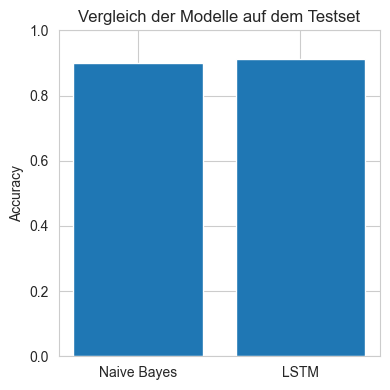

In [16]:
from sklearn.metrics import accuracy_score

# Vorhersagen beider Modelle (falls noch nicht berechnet)
y_pred_nb = nb_model.predict(X_test_text)          # Naive Bayes: direkt auf Texten
y_pred_lstm = wrapped_lstm.predict(X_test_pad)     # LSTM: auf gepaddeten Sequenzen

# Accuracy für beide Modelle berechnen
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_lstm = accuracy_score(y_test, y_pred_lstm)

print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"LSTM Accuracy:        {acc_lstm:.4f}")

# Einfaches Balkendiagramm zum Vergleich
plt.figure(figsize=(4, 4))
plt.bar(["Naive Bayes", "LSTM"], [acc_nb, acc_lstm])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Vergleich der Modelle auf dem Testset")
plt.tight_layout()
plt.show()
